Perspective Projection
----------------------------------------
[10039.313845252786, -244.36253641790051, 3728.0107922739617, -3669853349.3550463]
[-50.47965979268584, -10217.632115389333, 6585.832503071403, 55400073181.98617]
[0.010582841934294953, -0.03234773381099907, 0.9994206459613922, 168911.14564244283]
----------------------------------------
---> Pixel Coordinates: (2938.3452497870217, 2484.7347824591498) 
----------------------------------------
---> Pixel Coordinates: (2743.213186527079, 2508.085141001929) 
----------------------------------------
---> Pixel Coordinates: (2710.216496287416, 2253.0345881900257) 
----------------------------------------
---> Pixel Coordinates: (2760.9366348076373, 2247.452531144176) 
----------------------------------------
---> Pixel Coordinates: (2725.3505760252447, 1952.197743758674) 
----------------------------------------
---> Pixel Coordinates: (2604.165932604981, 1968.1017329853264) 
----------------------------------------
---> Pixel 

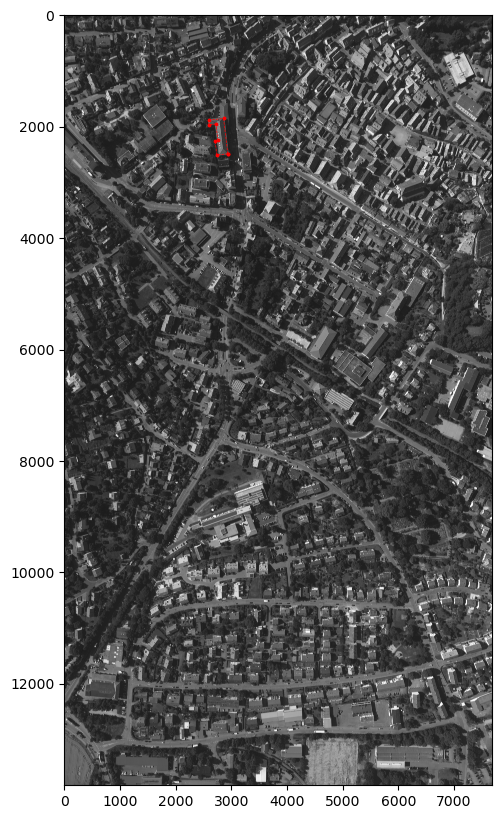

'\n    You can take this warning when you try to run this code for the first time in that kernel\n    but it is not a problem its about pixel amount of the image :)\n    WARNING ---> anaconda3\\Lib\\site-packages\\PIL\\Image.py:3157: DecompressionBombWarning: Image size (106168320 pixels) exceeds limit of 89478485 pixels, \n    could be decompression bomb DOS attack. warnings.warn(\n'

In [5]:
import math
'''
    You can take this warning when you try to run this code for the first time in that kernel
    but it is not a problem its about pixel amount of the image :)
    WARNING ---> anaconda3\Lib\site-packages\PIL\Image.py:3157: DecompressionBombWarning: Image size (106168320 pixels) exceeds limit of 89478485 pixels, 
    could be decompression bomb DOS attack. warnings.warn(
'''


'''
    I write this functions because libraries are forbidden in this task 
    Numpy a library too so ı dont want to use it for this operations 
    To understand these functions, I added simple explanations to the necessary lines.
    
'''

def matrix_multiplication(A, B):    
    C = [] # For storing the new matrix after the multiplication
    for i in range(len(A)): #This part representing the rows 
        C.append([])
        for j in range(len(B[0])): #This part representing the cloumns
            C[i].append(0)
            for k in range(len(B)):
                C[i][j] += float(A[i][k]) * float(B[k][j])

    return C


def convert_to_pixel_coordinates(world_coordinates, perspective_projection_matrix):
    '''
        You may see a term called 'list comprehension ' used frequently in the explanations here. 
        The reason for this is that since I wrote these codes without using Numpy, 
        the programming language does not actually perceive these matrices as a matrix. 
        I use the word list comprehension  because I benefit from the operation logic
        that can be done with a list while writing calculations and functions.
        
        for pixel_coordinates_homogeneous = The matrix-vector multiplication between 
        perspective_projection_matrix and each set of world_coordinates is performed in this section
        using a list comprehension. The outcome is kept in a homogeneous coordinates-representing 
        variable named pixel_coordinates_homogeneous.
        
        pixel_coordinates_normalized = In this section, homogeneous coordinates are normalized by
        dividing each coordinate by its third element. 
        A variable named pixel_coordinates_normalized holds the outcome.
        
        pixel_coordinates = The first two elements of each normalized coordinate are extracted 
        in this part in order to generate a list of tuples called pixel_coordinates. 
        The generated pixel coordinates are these tuples.

    '''
    pixel_coordinates_homogeneous = [    
        [
            sum(row[i] * world_coord[j] for i, j in zip(range(4), range(4)))
            for row in perspective_projection_matrix
        ]
        for world_coord in world_coordinates
    ]

    # Normalize homogeneous coordinates
    pixel_coordinates_normalized = [
        [coord / pixel_coord[2] for coord in pixel_coord[:2]]
        for pixel_coord in pixel_coordinates_homogeneous
    ]

    # Extract pixel coordinates
    pixel_coordinates = [
        (coord[0], coord[1]) for coord in pixel_coordinates_normalized
    ]

    return pixel_coordinates




########################################## OUR PARAMETERS ##########################################
'''
    In thıs part ı write all the necessary information for coordinate transformation
    The - signs in the interior and exterior parameters
    In order to maintain a standard reference frame in photogrammetry, 
    the negative signs in these parameters are the conventional way to indicate the orientation and position
    of the camera in a particular coordinate system.
    
    This is what we learned in the week 4 slide and lecture :
   
                Sometimes, the image and the camera coordinate
                systems have opposite orientations and in that case 
                they are opposite ;)
                                        - Ali Özgün OK 
    
'''
# Interior orientation parameters
interior_orientation = [
    [-120 / 0.012, 0, 3840, 0],   # focal lenght = 120mm , pixel size = 0.012mm
    [0, 120 / 0.012, 6912, 0],    # file coord. system = col(3840) and row(6912)
    [0, 0, 1, 0],
]

# Exterior orientation parameters
exterior_orientation = [
    [1, 0, 0, -497049.238],       #These are 'Projection Centres' for camera
    [0, 1, 0, -5420301.525],      # X = 497049.238
    [0, 0, 1, -1163.806],         # Y = 5420301.525
    [0, 0, 0, 1],                 # Z = 1163.806
]

# These are 'Rotation' Angles primary, secondary and teriary
# I give the name like this because ı see the rotation matrix in pdf and ı want to you like same
# I dont write a function for that too because its boring so ı made this by hand :D
omega_d = (2.05968 / 400) * 360    
phi_d = (0.67409 / 400) * 360
kappa_d = (199.23470 / 400) * 360

# Convert from degree to radian
omega = math.radians(omega_d)
phi = math.radians(phi_d)
kappa = math.radians(kappa_d)
 
# file_coordinate_pixel = [6912, 3840, 10000] # we dont use them in the code just for remembering the values :D They are in the interior_orientation

# Rotation matrix 
R = [
    [
        math.cos(phi) * math.cos(kappa) + math.sin(phi) * math.sin(omega) * math.sin(kappa),
        math.cos(omega) * math.sin(kappa),
        -math.sin(phi) * math.cos(kappa) + math.cos(phi) * math.sin(omega) * math.sin(kappa),
        0,
    ],
    [
        -math.cos(phi) * math.sin(kappa) + math.sin(phi) * math.sin(omega) * math.cos(kappa),
        math.cos(omega) * math.cos(kappa),
        math.sin(phi) * math.sin(kappa) + math.cos(phi) * math.sin(omega) * math.cos(kappa),
        0,
    ],
    [math.sin(phi) * math.cos(omega), -math.sin(omega), math.cos(omega) * math.cos(phi), 0],
    [0, 0, 0, 1],
]



########################################## CALCULATION PART ##########################################


'''
    In that part we have all information and functions for calculations.
    The procedures for calculating pixel coordinates are below.
    And yes it is really short because ı write the functions for it,
    They are doing the job without numpy :D
    
'''
# Projection matrix
perspective_projection = matrix_multiplication(interior_orientation, R)
perspective_projection_final = matrix_multiplication(perspective_projection, exterior_orientation)

# These are our world coordinates for building roof and ı add one more dimension for operations. 
world_coordinates = [
    [497113.220, 5419946.461, 287.650, 1],
    [497130.081, 5419948.322, 287.650, 1],
    [497132.582, 5419926.619, 287.700, 1],
    [497128.209, 5419926.155, 287.650, 1],
    [497130.884, 5419901.053, 287.650, 1],
    [497141.373, 5419902.170, 287.300, 1],
    [497142.131, 5419895.066, 287.650, 1],
    [497118.956, 5419892.610, 287.650, 1],
    [497113.220, 5419946.461, 287.650, 1]
]

# Convert to pixel coordinates using the perspective projection matrix
pixel_coordinates = convert_to_pixel_coordinates(world_coordinates, perspective_projection_final)

print("Perspective Projection\n----------------------------------------")

for row in perspective_projection_final:
    print(row)
print("----------------------------------------")
# Print pixel coordinates
for pixel_coord in pixel_coordinates:
    print("--->",f"Pixel Coordinates: {pixel_coord}","\n----------------------------------------")
    
    
    
##################################### CONTROL AND VISUALIZE #########################################


'''
    After finding the pixel coordinates, 
    we can understand whether they make sense by seeing them on our image.
    If they are actually sitting on the corners of a roof, 
    we can assume that this process is correct.
    
    I dont write tons of explanation for this part because it is obvious
'''


import matplotlib.pyplot as plt


img = plt.imread('61.jp2') # read the image
fig = plt.figure(figsize=(10, 10)) # You can adjust size of the result from here etc 15 15  
plt.imshow(img,cmap='gray') # It will show the image in gray scale 

# Marking each pixel coordinate on the image
for coord in pixel_coordinates:
    plt.scatter(coord[0], coord[1], color='red', s=3) # You can adjust point visual from here
# Combine them and draw lines
for i in range(len(pixel_coordinates) - 1):
    x_vals = [pixel_coordinates[i][0], pixel_coordinates[i + 1][0]]
    y_vals = [pixel_coordinates[i][1], pixel_coordinates[i + 1][1]]
    plt.plot(x_vals, y_vals, color='red', linestyle='--', linewidth=0.5) #You can adjust the line visual from here 
    
plt.show()

'''
    You can take this warning when you try to run this code for the first time in that kernel
    but it is not a problem its about pixel amount of the image :)
    WARNING ---> anaconda3\Lib\site-packages\PIL\Image.py:3157: DecompressionBombWarning: Image size (106168320 pixels) exceeds limit of 89478485 pixels, 
    could be decompression bomb DOS attack. warnings.warn(
'''


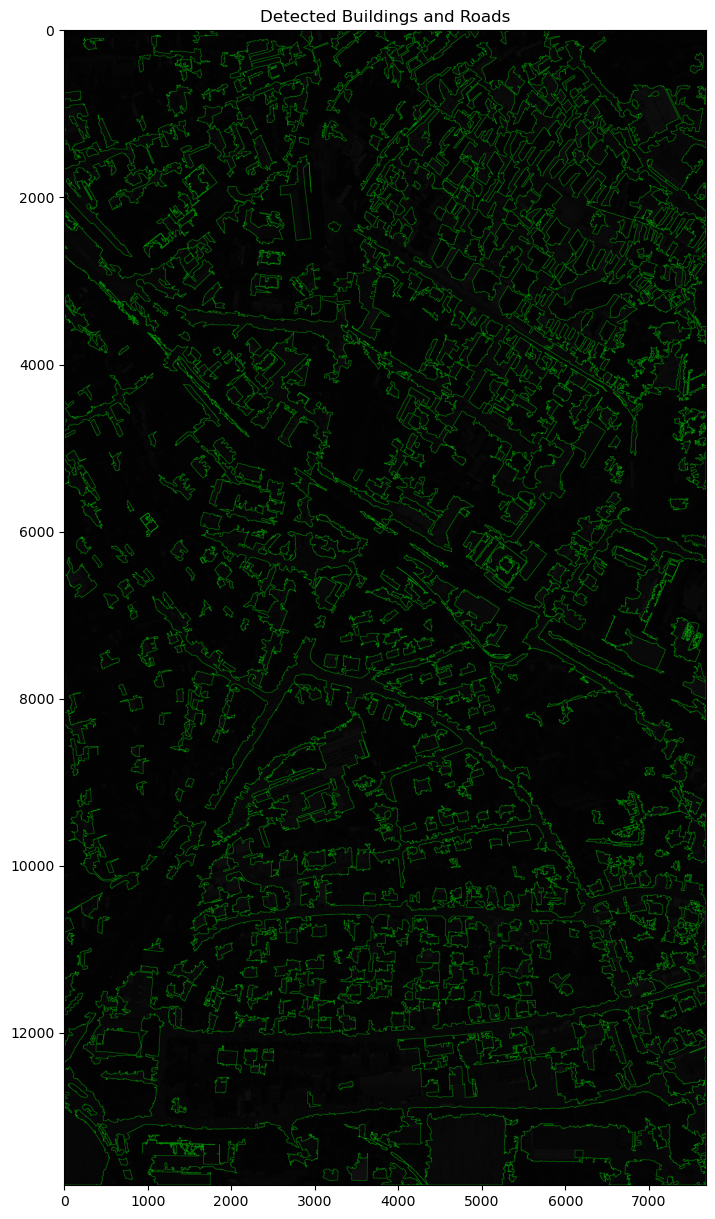

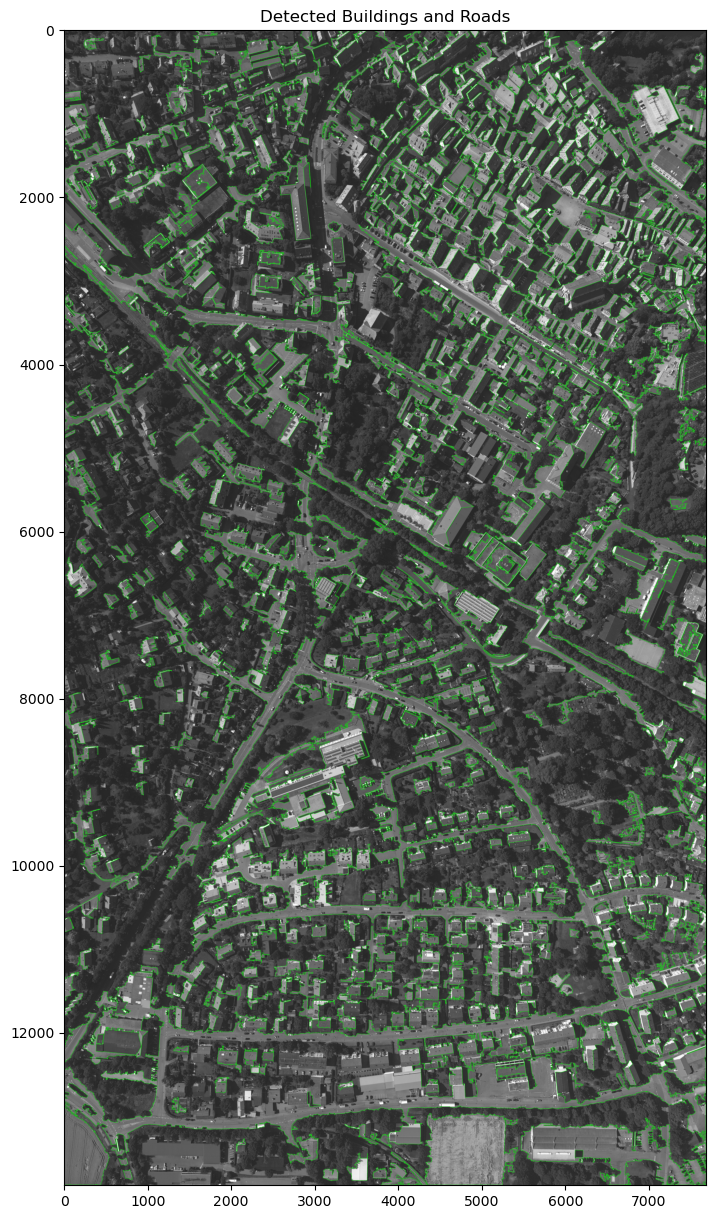

In [3]:
'''
    While searching for a solution to this question, I learned many different methods 
    and deep-learning models. I have learned a lot of new information and a challenge
    for myself, and since I will talk about all of them in the report, 
    I just wanted to give a little information in this section.
'''

import cv2
import numpy as np
from matplotlib import pyplot as plt

def detect_buildings(img_path):
    '''
        The morphological operation and thresholding method used in the operations 
        performed by this function are as follows.
        Morphological operations are used to highlight or correct shapes and structures in the image.
        For example, to highlight edges, combine or separate objects. The shutdown process is used in 
        this code and it works as follows; It closes small holes in the image and is used to combine objects. 
        It creates 5x5 sized kernels and applies occlusion on the image, so objects become more distinct.
        
        Thresholding is used to separate pixel values in an image into two different regions by comparing 
        them with a certain threshold value. I preferred to use the otsu method. This method aims to 
        find the ideal threshold value according to the histogram of the image.
       
        Contours represent the boundaries of objects on an image. They consist of a series of points and
        are used in applications such as object detection and recognition.
        All the previous stages were done so that we can find the contours more easily and accurately.

        Canny or Harris corner detection methods are not give a nice result in this image because the 
        task is more complex than it seems like, details will be in the report. I tried them all :)

    '''  
    img = cv2.imread(img_path)

    # Pre-process for image control gray scale or not 
    if len(img.shape) == 2:
        gray = img
    else:
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) # else make it gray scale 

    # Apply morphological operations 
    kernel = np.ones((5, 5), np.uint8) #5x5 kernel 
    morph_img = cv2.morphologyEx(gray, cv2.MORPH_CLOSE, kernel)
    _, threshold = cv2.threshold(morph_img, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU) #otsu method with  using histogram

    # Find contours 
    # RETR_TREE = It determines whether an object contains another object. Find nested countours
    # CHAIN_APPROX_SIMPLE = Creates a simpler representation by removing unnecessary nodes of a contour. It only stores the start and end points of the contour.
    contours, _ = cv2.findContours(threshold, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

    # Create a copy of the original image to draw the detected buildings on
    img_copy = img.copy()

    # Loop through the contours and filter out those that are not likely to be buildings and roads (etc tree )
    for cnt in contours:
        '''
            If contours area is smaller than 4000 its ignore the contour
            It creates a bounding rectangle for the stroke, we use it to set the boundaries.
            x and y are the upper left corner coordinates of the bounding rectangle
            w stands for width
            h stands for height
            this method used to analyze specific areas
            In the aspect_ratio section, we calculate the aspect ratio of this
            bounding rectangle using width (w) and height (h).
            
        '''
        if cv2.contourArea(cnt) < 4000:  # Increased minimum area threshold "if you make it like 100000 most of the contours will lose"
            continue

        # Calculate the bounding rectangle of the contour
        x, y, w, h = cv2.boundingRect(cnt)

        # Calculate the aspect ratio of the bounding rectangle
        aspect_ratio = float(w) / h # float here to get the result as decimal number

        # Filter out contours with non-rectangular aspect ratio
        if aspect_ratio < 0.5 or aspect_ratio > 2:  # Added height-to-width ratio check "I tried lots of values in that part this is the most suitable scale for this image"
            continue                                # In this way, we can adjust the aspect ratio value here because we use it as float



        # Check if the contour contains any non-zero elements (excluding zero-value pixels)
        if not np.any(cnt):
            continue

        # Draw the filtered contours on the copy of the original image
        cv2.drawContours(img_copy, [cnt], 0, (0, 255, 0), 2)

    # Display the original image with the detected buildings
    plt.figure(figsize=(15, 15)) # Do it 20 20 for see it in bigger 
    plt.imshow(cv2.cvtColor(img_copy, cv2.COLOR_BGR2RGB))
    plt.title('Detected Buildings and Roads')
    plt.show()

# Run the function on an example image
#You need to write your own path for this or just carry the image working space for use it like me 
detect_buildings('61.jp2') #Original image to see results more clear you should add 
detect_buildings('61_N.jp2')# Normalized version of the image, ı gave this version to in the zip file